# Jaccard index between two multi-polygons 
## Simple example 

This notebook illustrates the computation of Jaccard similarity index between two simple multi-polygons using `shapely` and `satsense` python libraries.

 ### Creating  two simple multi-polygons 

In [1]:
# Python, shapely and satsense package imports
from matplotlib import pyplot
from shapely.geometry import MultiPolygon
from satsense.util.shapefile import show_multipolygon as shmp # visualization of multipolygons

# define the nodes of valid multi-polygons
a = [(0, 0), (0, 1), (1, 1), (1, 0), (0, 0)]
b = [(1, 1), (1, 2), (2, 2), (2, 1), (1, 1)]
c = [(2,3), (4,3), (4,4), (2,4), (2,3)]

multi1 = MultiPolygon([[a, []], [b, []] , [c, []]])

d = [(0, 0), (0, 2), (2, 2), (2, 0), (0, 0)]
e = [(3, 3), (3, 4), (4, 4), (4, 3), (3, 3)]

multi2 = MultiPolygon([[d, []], [e, []]])

print("Multi-polygon 1 valid?", multi1.is_valid)
print("Multi-polygon 2 valid?", multi2.is_valid)

Multi-polygon 1 valid? True
Multi-polygon 2 valid? True


### Visualizing the multi-polygons

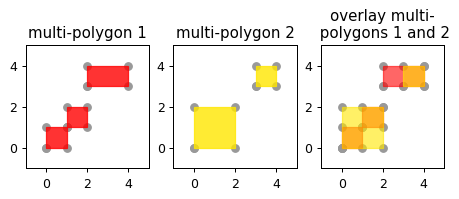

In [2]:
# Visualization parameters
RED = '#FF0000'
YOLK = '#FFE600'
al = 0.8
al_over = al - 0.2
show_verticies = True

extent = [-1, -1, 5, 5] # format of extent is [xmin, ymin, xmax, ymax]

# Visualize the multi-polygons
fig = pyplot.figure(1, dpi=90)

ax = fig.add_subplot(131)
shmp(multi1, ax, show_verticies, extent, RED, al, 'multi-polygon 1')
ax = fig.add_subplot(132)
shmp(multi2, ax, show_verticies, extent, YOLK, al, 'multi-polygon 2')
ax = fig.add_subplot(133)
shmp(multi1, ax, show_verticies, extent, RED, al_over, '') 
shmp(multi2, ax, show_verticies, extent, YOLK, al_over, 'overlay multi-\n polygons 1 and 2')    
    
pyplot.show()

### Jaccard Index between the two multi-polygons

In [3]:
# Satsense package import
from satsense.performance.jaccard_similarity import jaccard_index_multipolygons as jim # jaccard index computation

# intersections between the multi-polygons
intersec = multi1.intersection(multi2).area
print("The area of the intersection between the 2 multi-polygons is ",intersec)
# union
union = multi1.union(multi2).area
print("The area of the uinion between the 2 multi-polygons is ",union)
     
# compute the Jaccard index (defined as intersection/union)
print("The Jaccard index between the 2 multi-polygons is ", jim(multi1, multi2))


The area of the intersection between the 2 multi-polygons is  3.0
The area of the uinion between the 2 multi-polygons is  6.0
The Jaccard index between the 2 multi-polygons is  0.5
